In [ ]:
%load_ext autoreload
%autoreload 2

from model import *
from utils import *
from generate import *

# setup stylenet
params = StylenetArgs()
params.gpu = '0'
params.backend = 'cudnn'

dtype, multidevice, backward_device = setup_gpu(params)
stylenet = StyleNet(params, dtype, multidevice, backward_device)


# Full template

Iteration 1000/1000: 
  Content loss = 1.1e+06
  Style loss = 1.2e+02, 5.1e+03, 7.9e+03, 1.2e+05, 5.3e+02
  Histogram loss = 
  TV loss = 2.9e+04
  Total loss = 1.30e+06


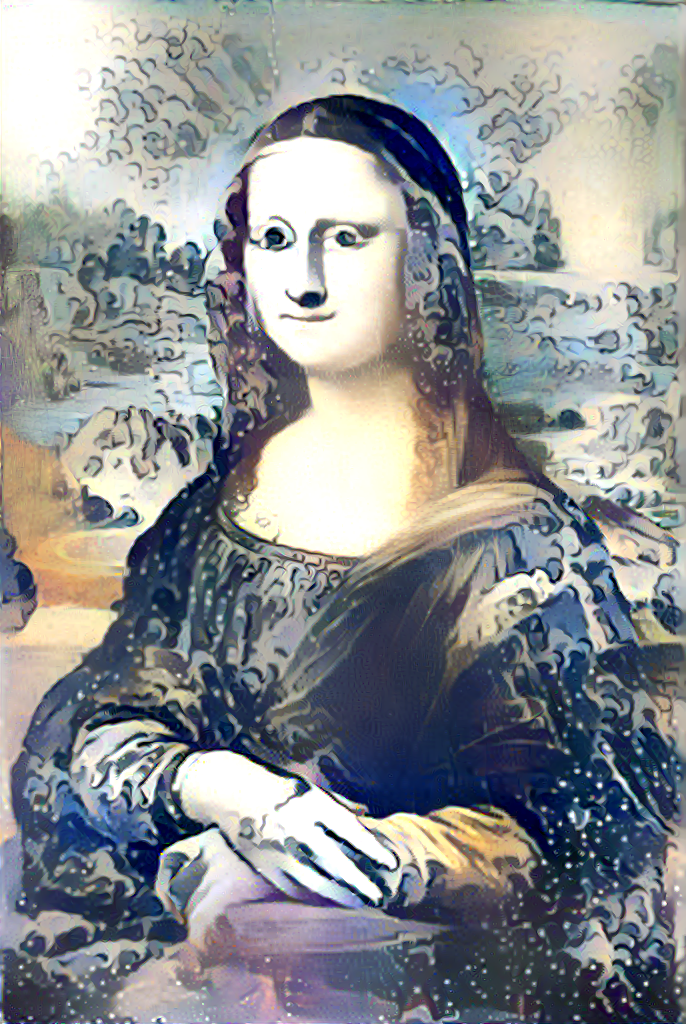

In [18]:
# set stylenet hyper-parameters
stylenet.set_content_weight(5e2)
stylenet.set_style_weight(1e2)
stylenet.set_hist_weight(1e3)
stylenet.set_style_statistic('gram')
stylenet.set_tv_weight(1e-2)

# set stylenet style layers individually

#stylenet.set_style_layer(0, 'covariance', 5e3)
#stylenet.set_style_layer(1, 'gram', 1e2)
#stylenet.set_style_layer(2, 'gram', 1e2)
#stylenet.set_style_layer(3, 'gram', 1e2)
#stylenet.set_style_layer(4, 'gram', 1e2)
#stylenet.set_hist_layer(0, 5e1)
#stylenet.set_hist_layer(1, 5e1)
#stylenet.set_hist_layer(2, 5e1)
#stylenet.set_hist_layer(3, 5e1)


# parameters
image_size = 1024
style_scale = 1.0

# load content image
content_path = 'examples/inputs/monalisa.jpg'
content_image = load_image(content_path, image_size)

# load style images
#style_paths = ['examples/inputs/starry_night.jpg',
#               'examples/inputs/cubist.jpg']
style_paths = ['examples/inputs/hokusai.jpg']
 
style_size = int(image_size * style_scale)
style_images = [load_image(path, style_size) for path in style_paths]

# load content masks for each style image
content_mask_paths = ['examples/segments/monalisa1a.png',
                      'examples/segments/monalisa1b.png']
content_masks = [load_image(path, image_size, to_normalize=False) 
                 for path in content_mask_paths]

# capture the style and content images
stylenet.capture(content_image, style_images, None, content_masks)

# initialize input image with a random image
# or load it from another image (e.g. content)
input_img = random_image_like(content_image)
#input_img = load_image(content_path, image_size)
input_img = load_image('results/ml_cubist_lua_100.png', image_size)

# optimizer
img = optimize(stylenet, 
               input_img, 
               num_iterations=1000,  
               update_iter=100, 
               display_preview=True,
               save_preview=True,
               save_preview_path='results/preview/preview.png')

# change back to original colors of content image if you want
#img = original_colors(content_image, img)

save(img, "results/output_single.png")